## Importing necessary libraries

In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading and Understanding the Data

In [199]:
df = pd.read_csv("day.csv")

In [200]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


OBSERVATION : There are no NULL values

In [202]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Dropping Unneccesary Coloumns
INSTANT - This is simply the index and does is not required for our analysis. <br>
CASUAL and REGISTERED - These add up to the final count and therefore can be dropped. <br>
DTEDAY - All the information required from this variable is aleady preset in Month, Weekday and yr.

In [203]:
#droppimg unneccesary coloumns
#dropping instant column,  dteday, 
df = df.drop(columns = 'instant')


In [204]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [205]:
drop_cols = ['dteday','casual','registered']
df = df.drop(columns = drop_cols)

In [206]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [207]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Mapping of Categorical values from Data Dictionary

In [209]:
df['season'] = df['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

df['weathersit'] = df['weathersit'].replace({1:'good',2:'moderate',3:'bad',4:'severe'})

df['mnth'] = df['mnth'].replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})




df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,6,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,0,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,1,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,2,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,3,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [210]:
df['weekday'] = df['weekday'].replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


### Data Visualization

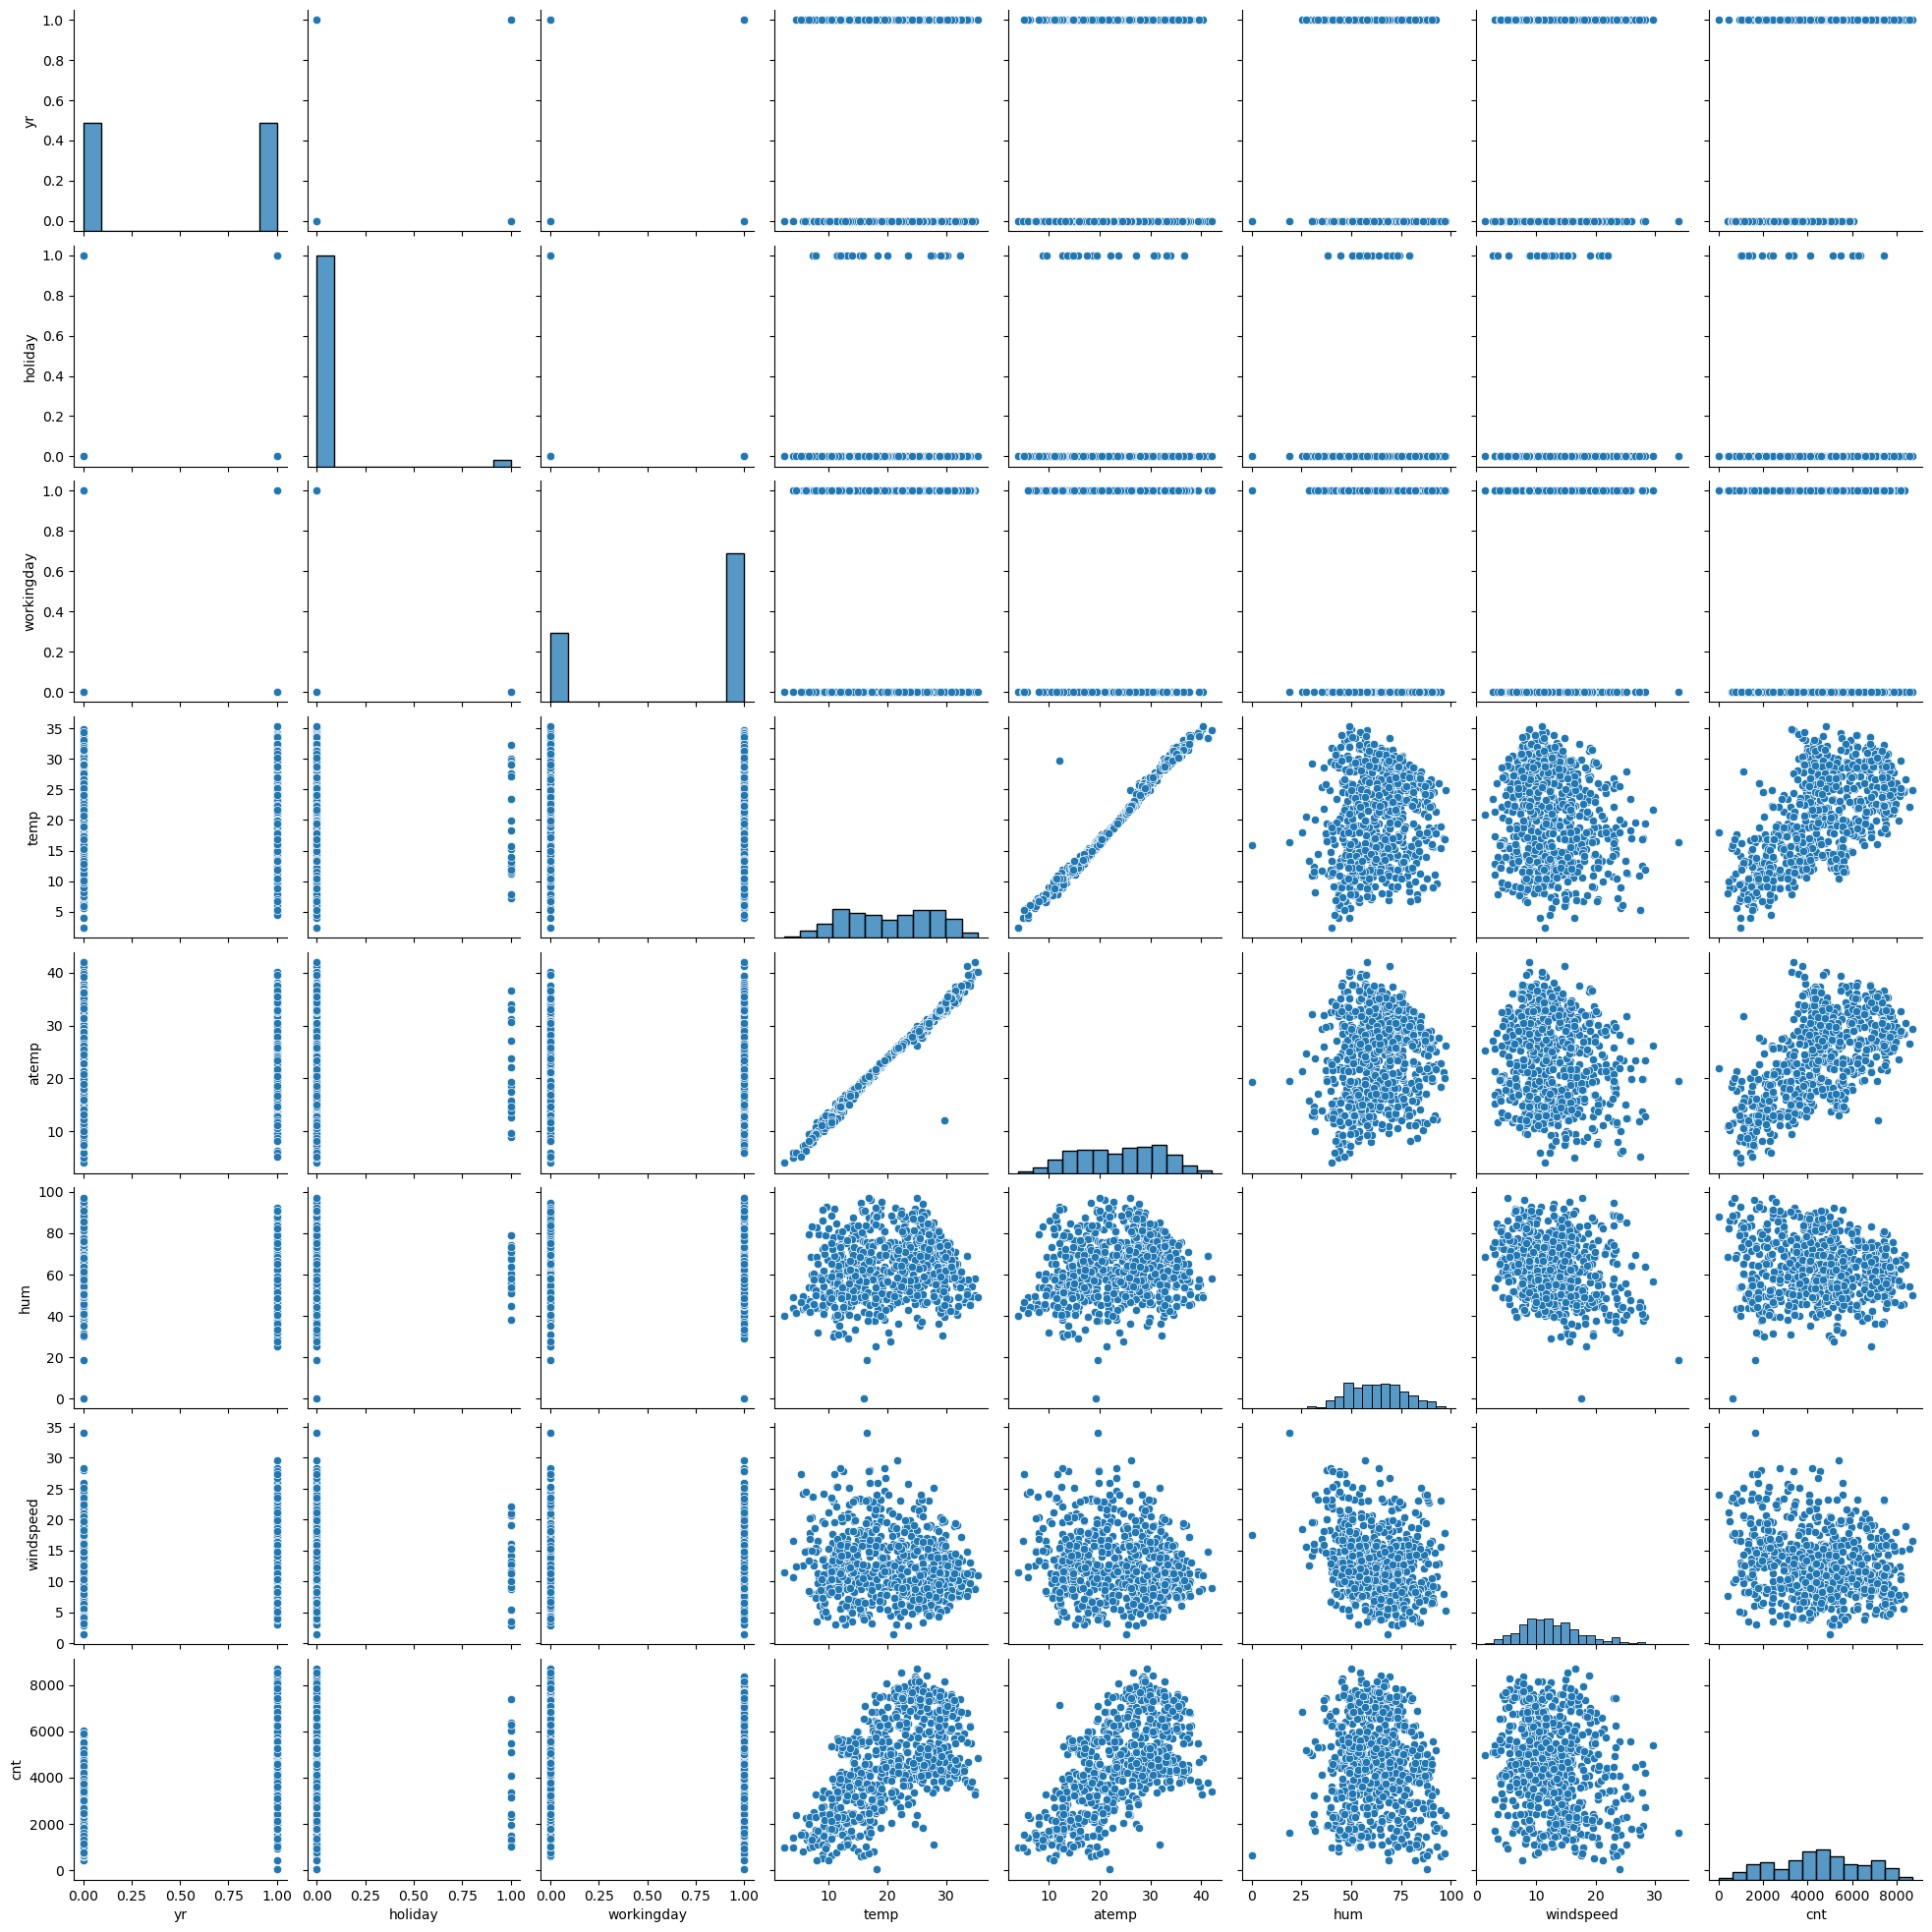

In [211]:
sns.pairplot(df)
plt.show()

OBSERVATION: There is a very good co-relation between atemp and temp. Thhis is understandable as atemp is derieved from temp. We can also observe that temp has a co-relation with cnt.

<Axes: xlabel='workingday', ylabel='cnt'>

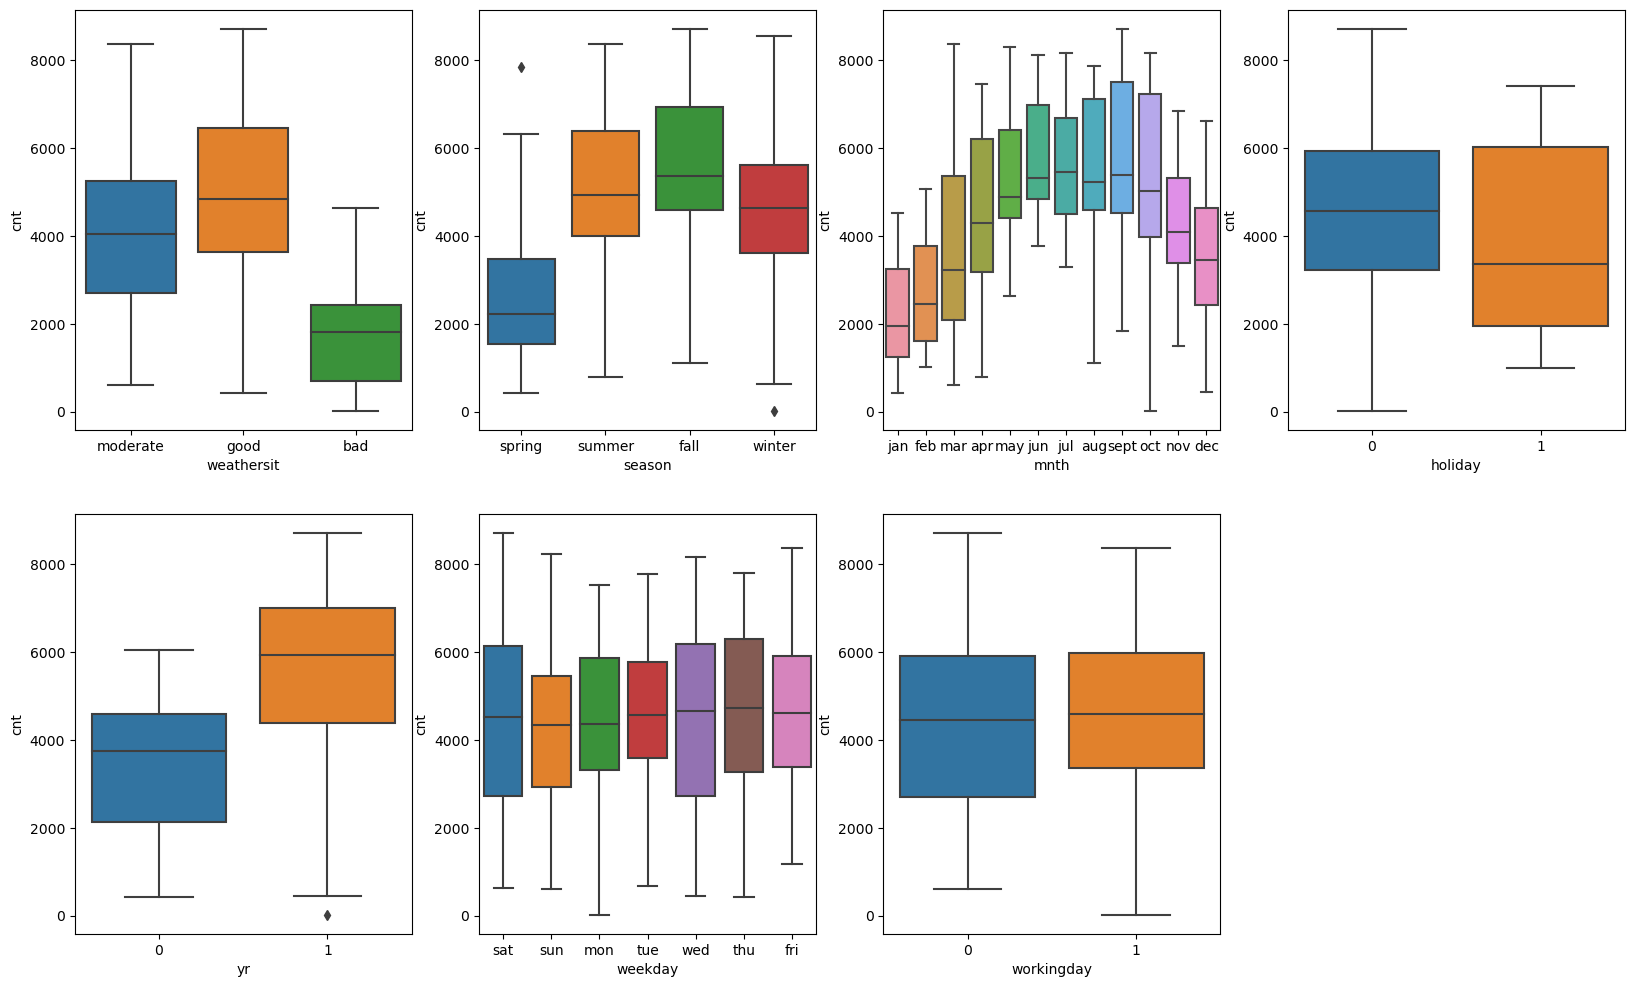

In [212]:
plt.figure(figsize=(20,12)) 
plt.subplot(2,4,1)
sns.boxplot(x ="weathersit",y="cnt",data = df)

plt.subplot(2,4,2)
sns.boxplot(x ="season",y="cnt",data = df)

plt.subplot(2,4,3)
sns.boxplot(x ="mnth",y="cnt",data = df)

plt.subplot(2,4,4)
sns.boxplot(x ="holiday",y="cnt",data = df)

plt.subplot(2,4,5)
sns.boxplot(x ="yr",y="cnt",data = df)

plt.subplot(2,4,6)
sns.boxplot(x ="weekday",y="cnt",data = df)

plt.subplot(2,4,7)
sns.boxplot(x ="workingday",y="cnt",data = df)

OBSERVATIONS:
•	Weather – Weather has a very good impact on the bike booking count. Most of the bookings happened in clear weather followed by misty weather and least booking happened in light snow/ rainy weather.<br>
•	Season – Most of the bookings happened in Fall followed by summer. Winter stands third and the least number of bookings happened in Spring.<br>
•	Months -  Most of the bookings happened from May to September.<br>
•	Holiday – More bookings happened on a non-holiday.<br>
•	Year – There has been a significant rise in booking from 2018 to 2019.<br>
•	Weekday – The bookings are almost evenly distributed through out the week


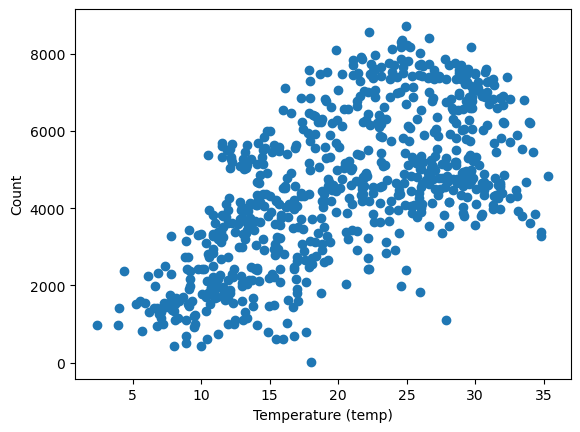

In [277]:
plt.scatter(x ="temp",y="cnt",data = df)
plt.xlabel("Temperature (temp)")
plt.ylabel("Count")
plt.show()

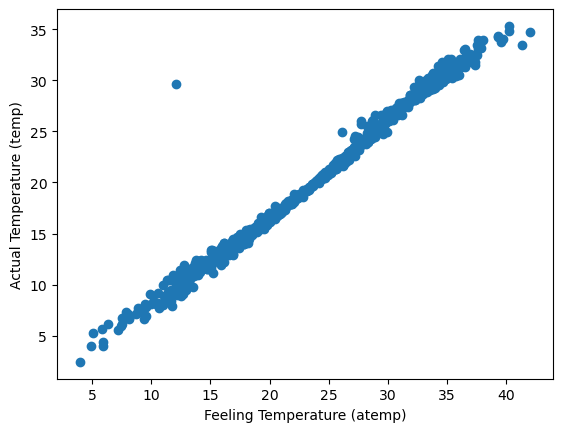

In [276]:
plt.scatter(x ="atemp",y="temp",data = df)
plt.xlabel("Feeling Temperature (atemp)")
plt.ylabel("Actual Temperature (temp)")
plt.show()

In [215]:
df['temp'].corr(df['atemp'])

0.9916961786905648

C:\Users\DELL\AppData\Local\Temp\ipykernel_13932\2234742001.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


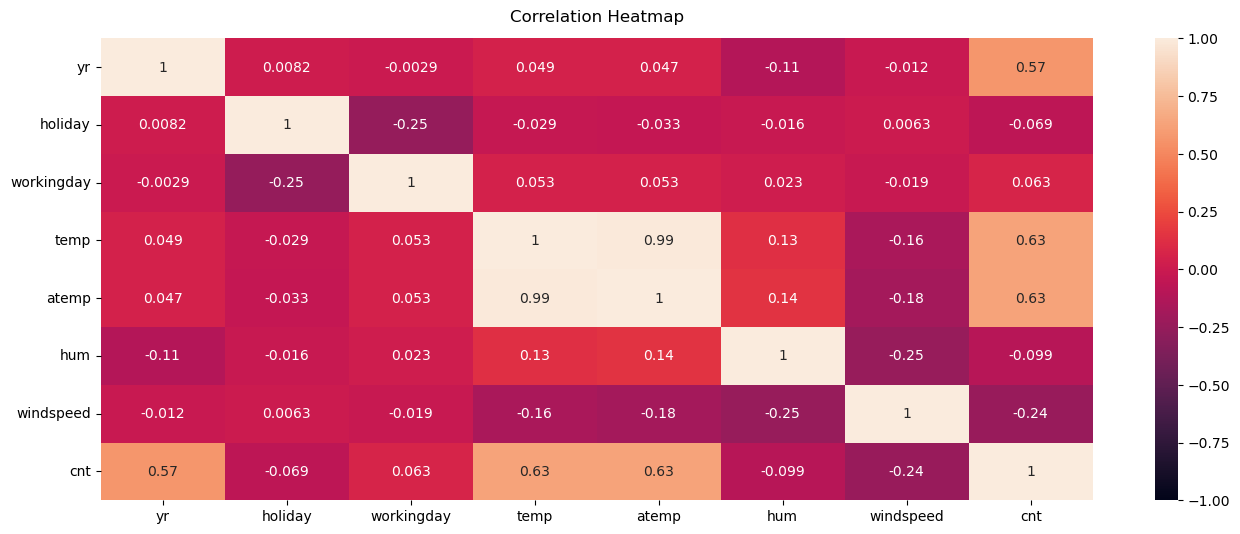

In [216]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [217]:
months = pd.get_dummies(df['mnth'], drop_first=True)
weekdays = pd.get_dummies(df['weekday'], drop_first=True)
weather_sit = pd.get_dummies(df['weathersit'], drop_first=True)
seasons = pd.get_dummies(df['season'], drop_first=True)

In [218]:
months.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [219]:
df = pd.concat([df,months,weekdays,weather_sit,seasons], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,1,0,0
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,...,0,0,0,1,0,1,0,1,0,0
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,...,0,0,0,0,1,1,0,1,0,0


In [220]:
df = df.drop(['mnth', 'weekday', 'weathersit', 'season'], axis = 1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,1,0,1,0,0


In [221]:
df.shape

(730, 30)

In [222]:
import sklearn

Splitting

In [223]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,train_size = 0.7, random_state=100)

In [224]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


REscaling

In [225]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [226]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,1,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


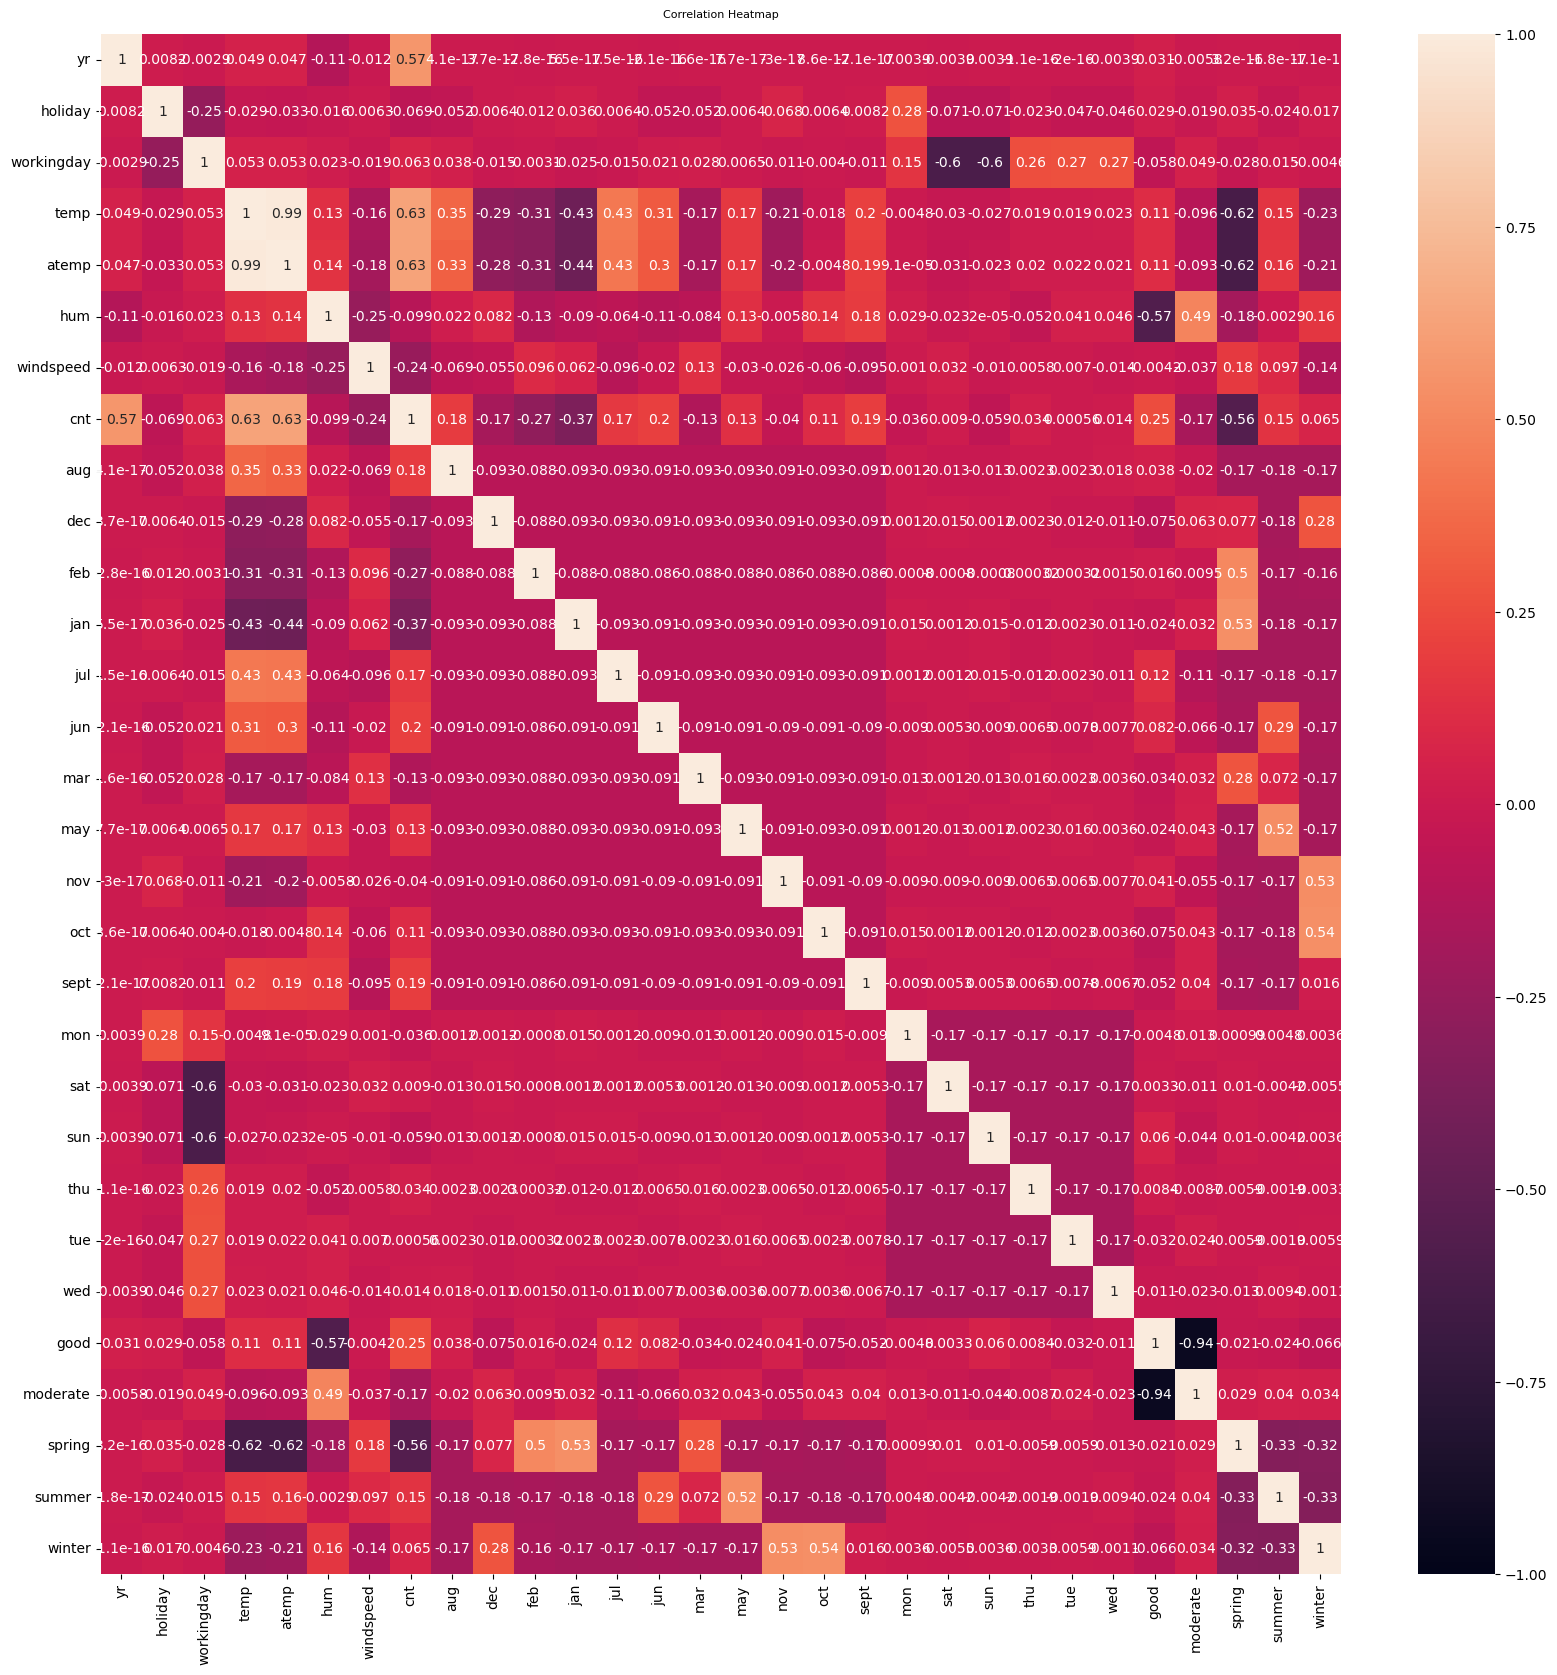

In [227]:
plt.figure(figsize=(20, 20))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12);

Training the model

In [228]:
y_train = df_train.pop('cnt')
X_train = df_train

In [229]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [230]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 30)
rfe = rfe.fit(X_train, y_train)

In [231]:
#List of variables selected in top 30 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 2),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', False, 2),
 ('jun', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('oct', False, 2),
 ('sept', True, 1),
 ('mon', False, 2),
 ('sat', False, 2),
 ('sun', False, 2),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('good', True, 1),
 ('moderate', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [232]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'dec', 'jan',
       'sept', 'good', 'moderate', 'spring', 'summer', 'winter'],
      dtype='object')

In [233]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [234]:
X_train_rfe = X_train[col]

In [235]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe = sm.add_constant(X_train_rfe)

In [236]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [237]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
0,const,139.99
3,temp,58.49
4,atemp,53.59
10,good,10.33
11,moderate,8.93
12,spring,4.99
14,winter,3.51
13,summer,2.46
5,hum,1.92
8,jan,1.65


In [238]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          4.12e-187
Time:                        21:40:26   Log-Likelihood:                 507.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     495   BIC:                            -921.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0465      0.048      0.978      0.3

In [239]:
# M2
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,139.55
9,good,10.29
10,moderate,8.90
11,spring,4.91
3,temp,4.03
13,winter,3.40
12,summer,2.37
4,hum,1.91
7,jan,1.65
6,dec,1.27


In [240]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.4
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          2.86e-188
Time:                        21:40:26   Log-Likelihood:                 507.38
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     496   BIC:                            -927.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0468      0.047      0.986      0.3

In [241]:
# M3
X_train_new = X_train_lm1.drop(['dec'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,138.93
8,good,10.20
9,moderate,8.85
10,spring,4.89
3,temp,3.79
12,winter,3.39
11,summer,2.32
4,hum,1.89
6,jan,1.56
5,windspeed,1.21


In [242]:
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.7
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          4.79e-189
Time:                        21:40:26   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0425      0.047      0.896      0.3

In [243]:
# M4
X_train_new = X_train_lm1.drop(['spring'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,117.48
8,good,10.14
9,moderate,8.84
4,hum,1.87
3,temp,1.71
6,jan,1.55
11,winter,1.50
10,summer,1.28
5,windspeed,1.19
7,sept,1.12


In [244]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.9
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          1.85e-189
Time:                        21:40:26   Log-Likelihood:                 504.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     498   BIC:                            -934.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0070      0.044      0.159      0.8

In [245]:
# M5
X_train_new = X_train_lm1.drop(['jan'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,114.25
7,good,10.12
8,moderate,8.81
4,hum,1.86
3,temp,1.27
10,winter,1.25
9,summer,1.19
5,windspeed,1.18
6,sept,1.11
1,yr,1.03


In [246]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          1.32e-189
Time:                        21:40:26   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0092      0.043     -0.213      0.8

In [247]:
lr1.params

const       -0.009196
yr           0.228910
holiday     -0.097453
temp         0.570769
hum         -0.175596
windspeed   -0.187000
sept         0.106905
good         0.235328
moderate     0.185010
summer       0.090651
winter       0.139117
dtype: float64

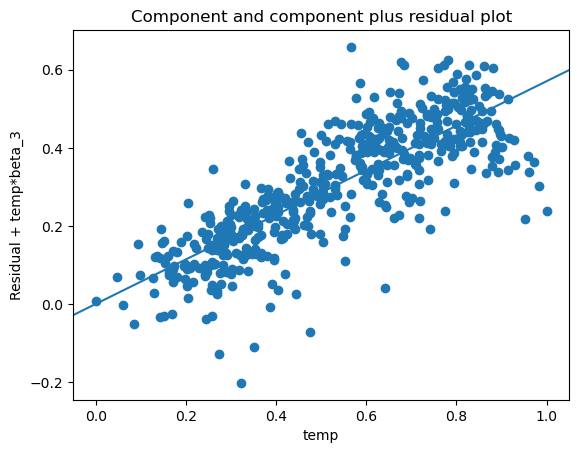

In [248]:
sm.graphics.plot_ccpr(lr1, 'temp')
plt.show()

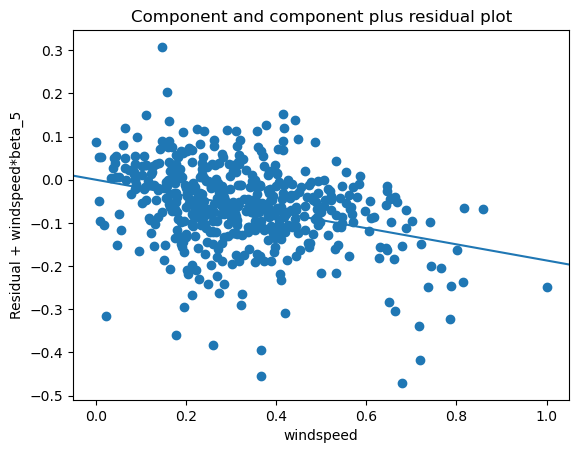

In [249]:
sm.graphics.plot_ccpr(lr1, 'windspeed')
plt.show()

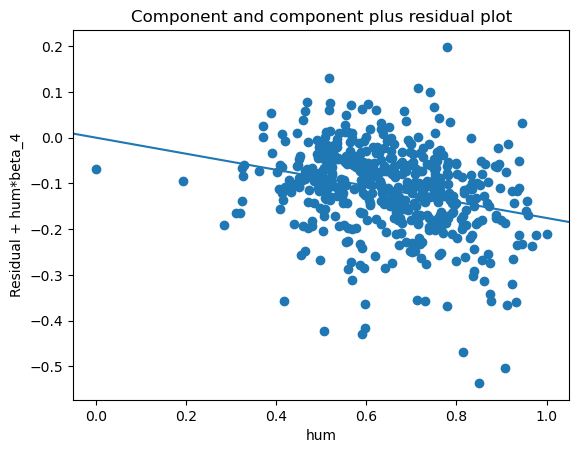

In [250]:
sm.graphics.plot_ccpr(lr1, 'hum')
plt.show()

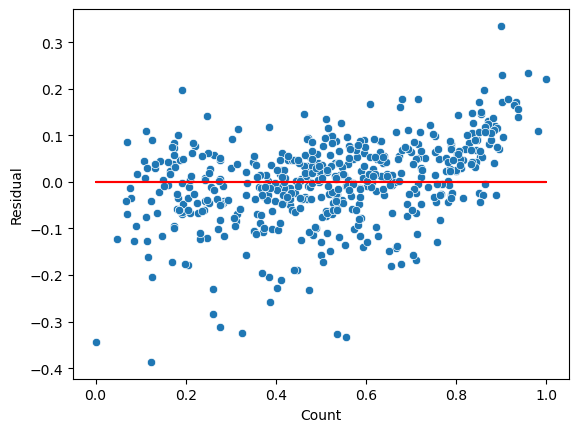

In [253]:
y_train_pred = lr1.predict(X_train_lm1)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train, (y_train - y_train), '-r')  # Red line at y=0
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [254]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'sept', 'good',
       'moderate', 'summer', 'winter'],
      dtype='object')

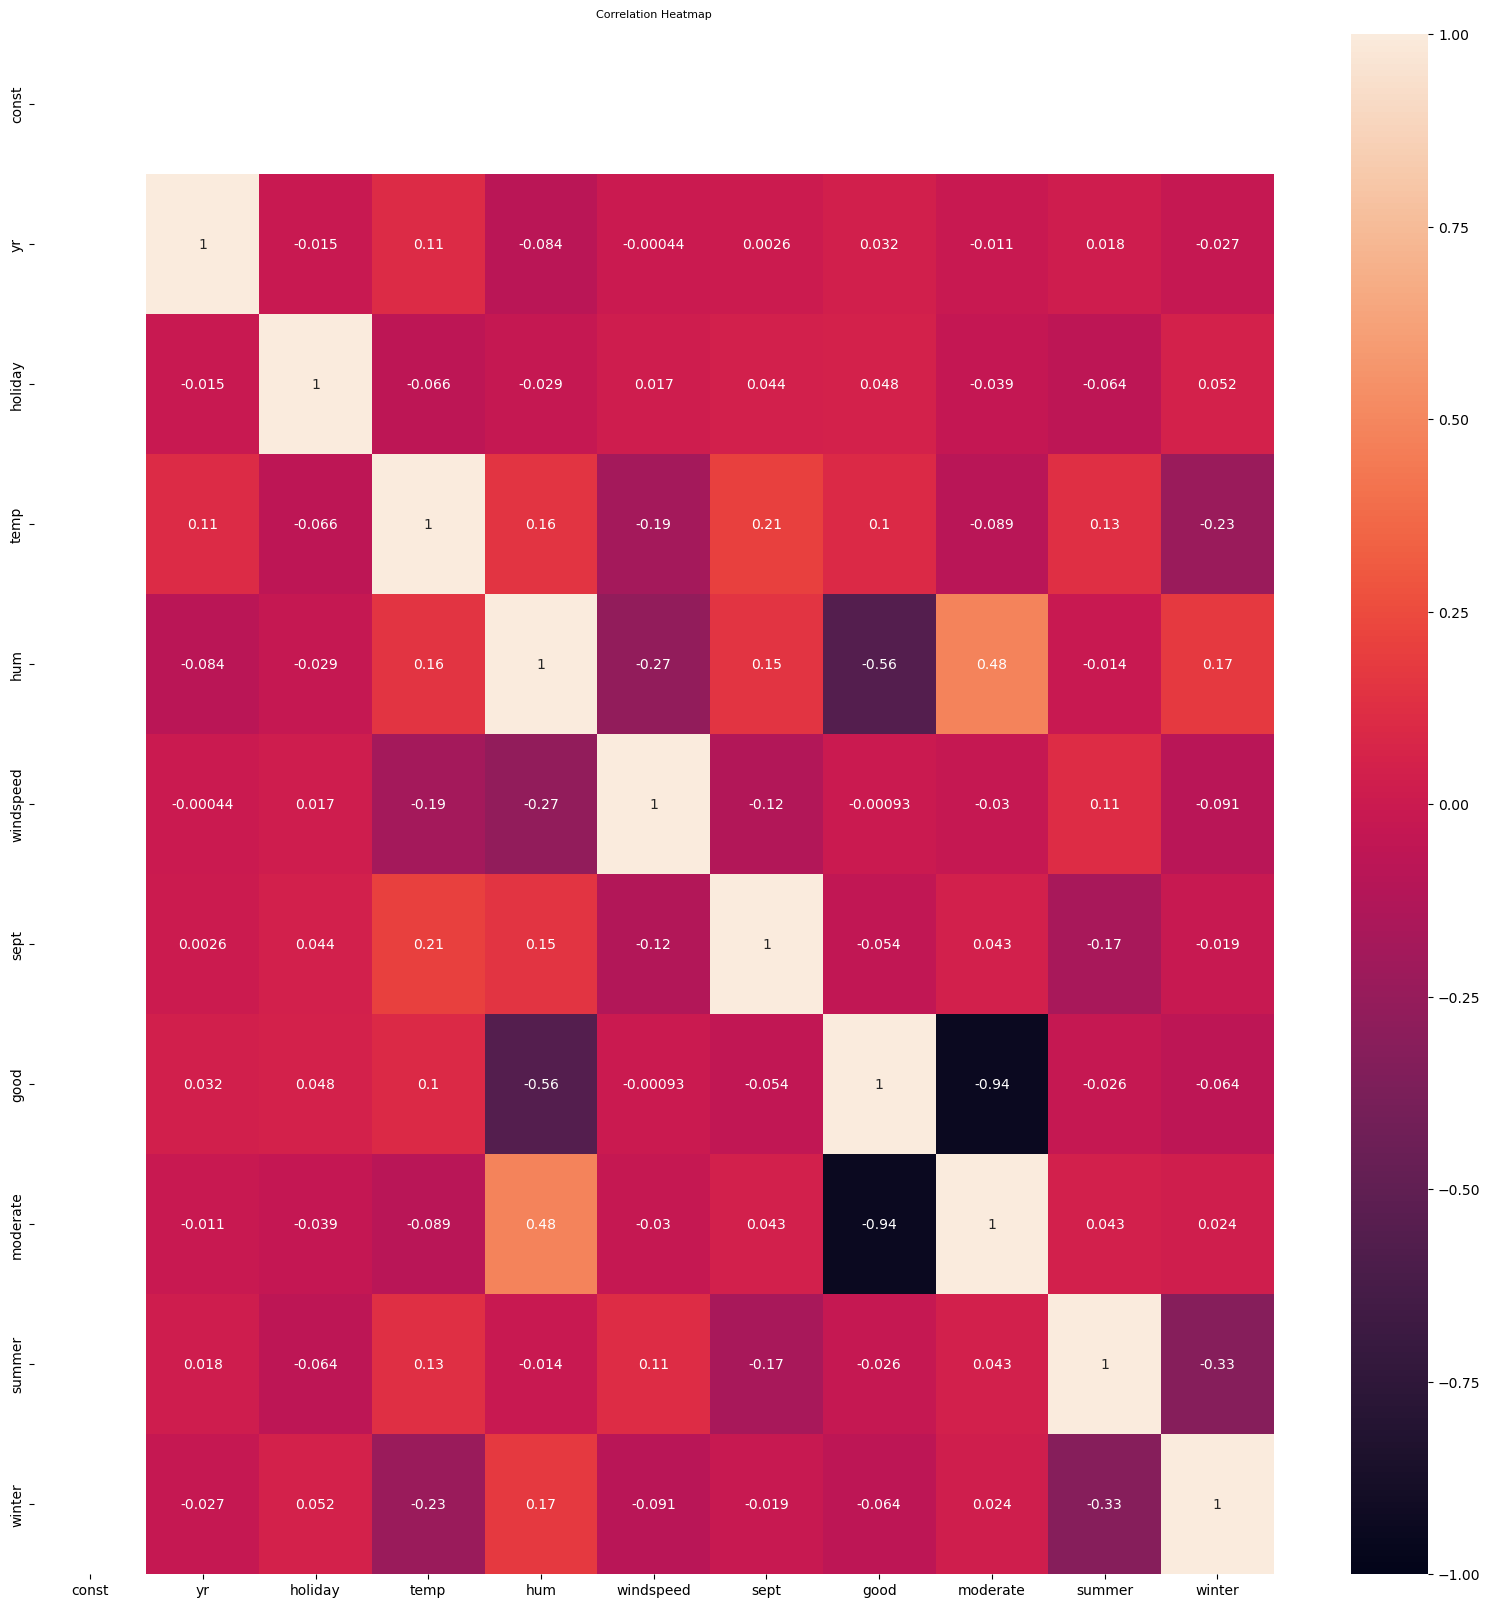

In [255]:
plt.figure(figsize=(20, 20))

heatmap = sns.heatmap(X_train_new.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12);

In [256]:
calculateVIF(X_train_new)

,Features,VIF
0,const,114.25
7,good,10.12
8,moderate,8.81
4,hum,1.86
3,temp,1.27
10,winter,1.25
9,summer,1.19
5,windspeed,1.18
6,sept,1.11
1,yr,1.03


C:\Users\DELL\AppData\Local\Temp\ipykernel_13932\3305655234.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((res), bins = 10)


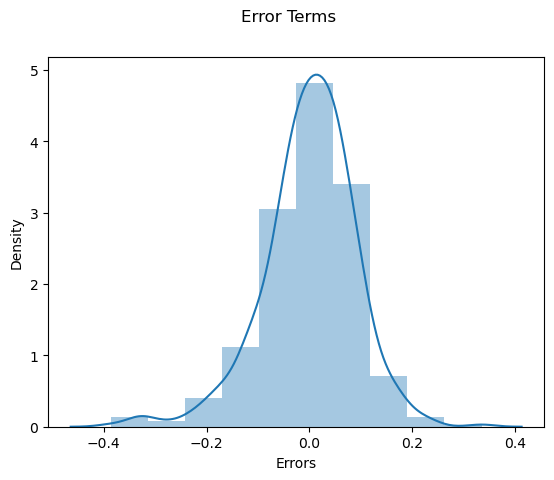

In [257]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 10)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

In [260]:
num_vars = ['temp','atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test[num_vars].head()

,temp,atemp,hum,windspeed,cnt
184,0.831783,0.769660,0.657364,0.084219,0.692706
535,0.901354,0.842587,0.610133,0.153728,0.712034
299,0.511964,0.496145,0.837699,0.334206,0.303382
221,0.881625,0.795343,0.437098,0.339570,0.547400
152,0.817246,0.741471,0.314298,0.537414,0.569029


In [262]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.654545,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.476601,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [266]:
y_test = df_test.pop('cnt')
X_test = df_test

In [268]:
X_train_lm1 = X_train_lm1.drop(['const'], axis = 1)

In [269]:
col1=X_train_lm1.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm1 = sm.add_constant(X_test)

X_test_lm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      220 non-null    float64
 1   yr         220 non-null    int64  
 2   holiday    220 non-null    int64  
 3   temp       220 non-null    float64
 4   hum        220 non-null    float64
 5   windspeed  220 non-null    float64
 6   sept       220 non-null    uint8  
 7   good       220 non-null    uint8  
 8   moderate   220 non-null    uint8  
 9   summer     220 non-null    uint8  
 10  winter     220 non-null    uint8  
dtypes: float64(4), int64(2), uint8(5)
memory usage: 13.1 KB


In [270]:
y_pred = lr1.predict(X_test_lm1)

Text(0, 0.5, 'y_pred')

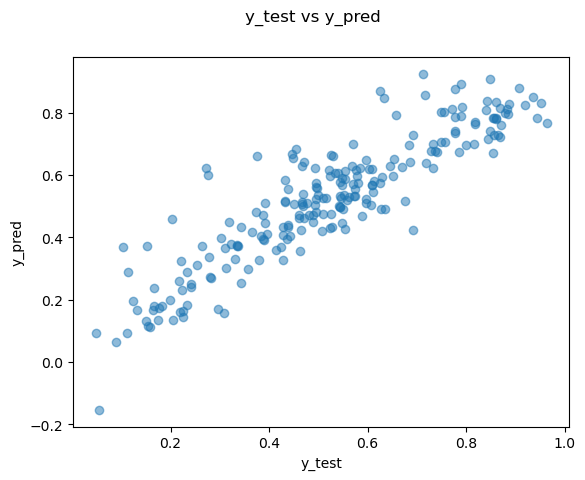

In [271]:
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')

In [ ]:


from sklearn.metrics import r2_score
r2 = round(r2_score(y_test, y_pred),4)
r2

In [273]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7959